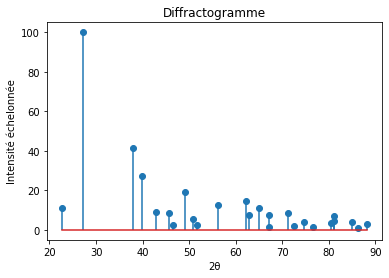

Voici donc le diffractogramme, dont on cherche donc les 3 premiers pics


In [99]:
from pymatgen.ext.matproj import MPRester
from pymatgen.analysis.diffraction import xrd 
from matplotlib import pyplot as plt
import numpy as np
with MPRester("AmIEJp5xndflZHbo32t") as m:
    
    structure = m.get_structure_by_material_id("mp-19")
    xrCal = xrd.XRDCalculator()
    graph = xrCal.get_pattern(structure)
    
    plt.stem(graph.x, graph.y, use_line_collection=True)
    plt.title('Diffractogramme')
    plt.xlabel('2θ')
    plt.ylabel('Intensité échelonnée')
    plt.show()
    print('Voici donc le diffractogramme, dont on cherche donc les 3 premiers pics')

In [126]:
# Création d'une fonction afin d'obtenir les n premiers maximums du diffractogramme, et retourne leur index dans un tableau
def maximum(data, n):
    maximum_indexes = []
    maximum_values = []

    for index, value in enumerate(data):

        # tant que le nombre d'index est plus petit que le nombre demandé
        if len(maximum_indexes) < n:
            maximum_indexes.append(index)
            maximum_values.append(value)

        # si la prochaine valeur est suppérieur au minimum
        elif min(maximum_values) < value:
            index_to_remove = maximum_values.index(min(maximum_values))

            maximum_values.pop(index_to_remove)
            maximum_indexes.pop(index_to_remove)

            maximum_indexes.append(index)
            maximum_values.append(value)

    return maximum_indexes

# On utilise donc la fonction que l'on vient de créer pour obtenir les maximums
maxi=maximum(graph.y,3)
print("\nLes 3 premiers maximums sont donc aux index :", maxi,"\n")


Les 3 premiers maximums sont donc aux index : [1, 2, 3] 



In [123]:
print("Coordonnées du premier maximum => x =", graph.x[1], ", y =", graph.y[1])
print("     Indices hkl associés : ",graph.hkls[1][0].get("hkl"), "et multiplicité de",graph.hkls[1][0].get("multiplicity") )

print("Coordonnées du deuxième maximum => x =", graph.x[2], ", y =", graph.y[2])
print("     Indices hkl associés : ",graph.hkls[2][0].get("hkl"), "et multiplicité de",graph.hkls[2][0].get("multiplicity") )

print("Coordonnées du troisième maximum => x =", graph.x[3], ", y =", graph.y[3])
print("     Indices hkl associés : ",graph.hkls[3][0].get("hkl"), "et multiplicité de",graph.hkls[3][0].get("multiplicity") )

Coordonnées du premier maximum => x = 27.28951589448032 , y = 100.00000000000001
     Indices hkl associés :  (1, 0, -1, 1) et multiplicité de 12
Coordonnées du deuxième maximum => x = 37.97207138436081 , y = 41.27876870993831
     Indices hkl associés :  (1, 0, -1, 2) et multiplicité de 12
Coordonnées du troisième maximum => x = 39.95992852431236 , y = 27.182539589232064
     Indices hkl associés :  (2, -1, -1, 0) et multiplicité de 6
